In [1]:
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
from matplotlib  import pyplot
from matplotlib.pyplot import figure

In [2]:
index = pd.date_range('11/07/2019', periods=35, freq='D')
df = pd.read_csv('Murali.csv',parse_dates=True)

In [3]:
df.set_index(index, inplace=True)
df.head()

,Date,DBSize
2019-12-07,12/7/2019 6:59,5.42
2019-12-08,12/8/2019 6:15,5.48
2019-12-09,12/9/2019 6:58,5.53
2019-12-10,12/10/2019 6:57,5.58
2019-12-11,12/11/2019 6:58,5.64


In [4]:
df.drop('Date', axis=1, inplace=True)

In [9]:
model = ARIMA([x for x in df.values], order=(5,1,0))
model_fit = model.fit(disp=0)

In [6]:
output = model_fit.forecast(steps=200)[0]
dfo=pd.DataFrame(output,columns=['DBSize'])
dfoindex = pd.date_range('12/12/2019', periods=200, freq='D')
dfo.set_index(dfoindex, inplace=True)

In [7]:
dfoutput = pd.concat([df, dfo], axis=0)

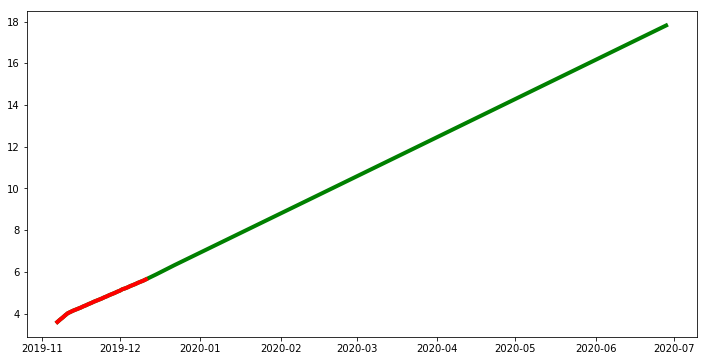

In [14]:
pyplot.figure(figsize=(12,6))
pyplot.plot(dfoutput,linewidth=4,color='green')
pyplot.plot(df,linewidth=4,color='red')